In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data -o auto-mpg.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30286  100 30286    0     0  22351      0  0:00:01  0:00:01 --:--:-- 22351


In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names -o auto-mpg.names 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1660  100  1660    0     0   8019      0 --:--:-- --:--:-- --:--:--  8019


In [3]:
!ls


auto-mpg.data  auto-mpg.ipynb  auto-mpg.names  README.md


In [4]:
!cat *.names

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset = pd.read_csv("auto-mpg.data",delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'orgin', 'car_name'])

In [7]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,orgin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
dataset.shape

(398, 9)

In [9]:
dataset.isnull().values.any()

False

In [10]:
dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,orgin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
orgin             int64
car_name         object
dtype: object

In [12]:
dataset['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [13]:
dataset = dataset.loc[dataset['horsepower'] != '?']

In [14]:
dataset['horsepower'] = dataset['horsepower'].astype(float)

In [15]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
orgin             int64
car_name         object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1689f55978>,
      dtype=object)

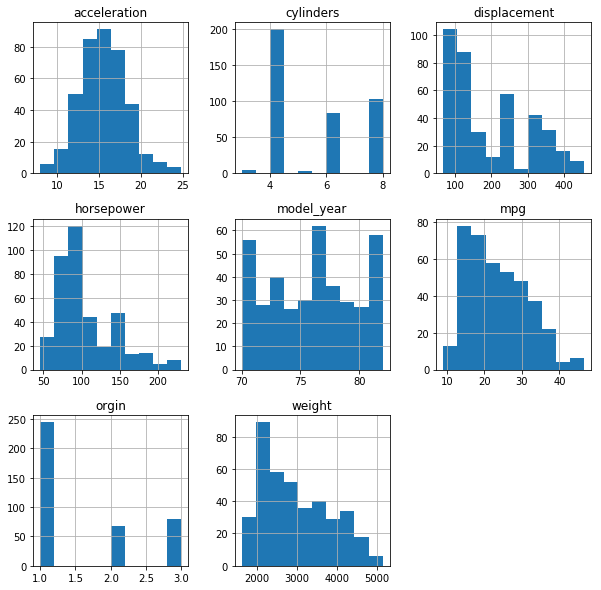

In [16]:
dataset.hist(figsize=(10,10))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


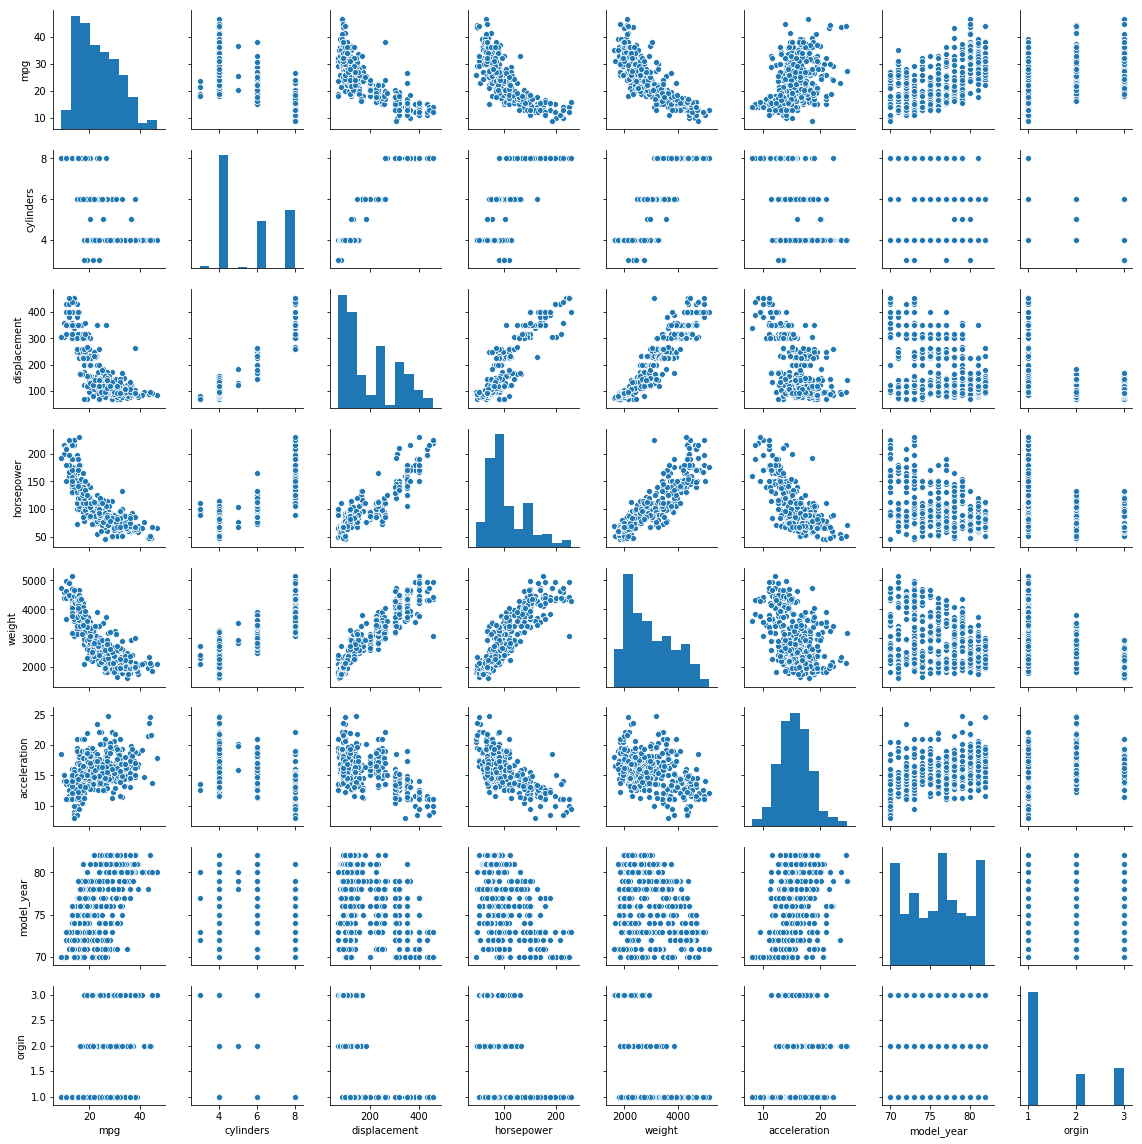

In [17]:
sns.pairplot(dataset, size = 2.0)

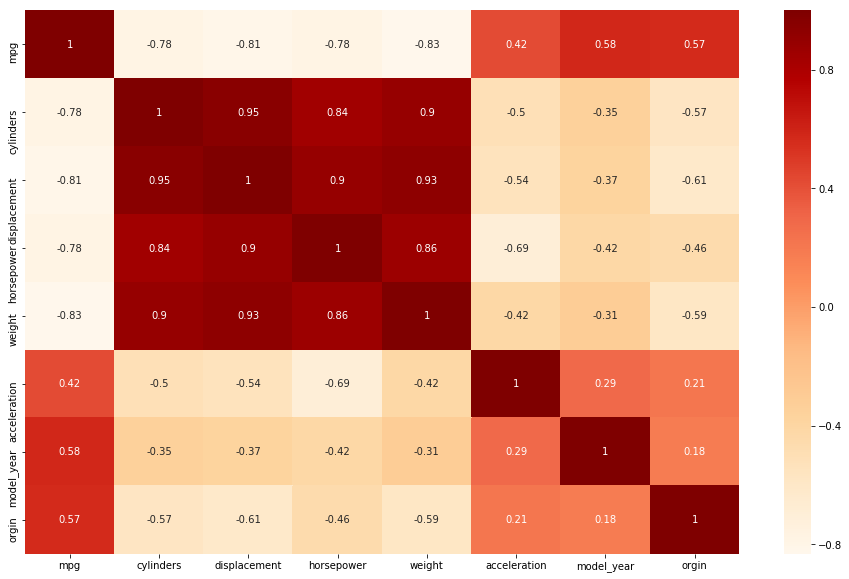

In [20]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


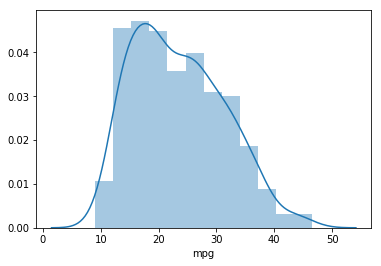

In [21]:
sns.distplot(dataset['mpg'])

In [27]:
from sklearn.model_selection import train_test_split

x=dataset.drop(['mpg', 'car_name'],axis=1)

x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,orgin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [28]:
y = dataset['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [31]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
model.coef_

array([-0.35963797,  0.01579344, -0.02806989, -0.00600577,  0.04119833,
        0.742086  ,  1.67379885])

In [35]:
predicted = model.predict(test_x)

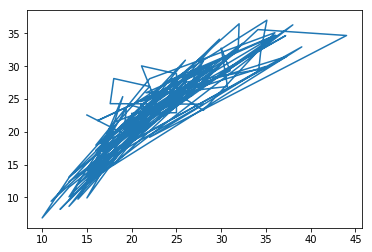

In [36]:
plt.plot(test_y,predicted)

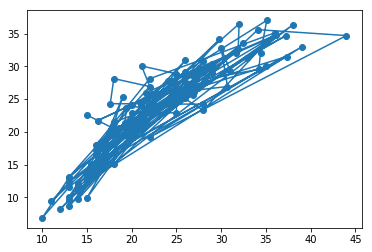

In [37]:
plt.scatter(test_y,predicted)
plt.plot(test_y,predicted)

In [38]:
model.score(test_x,test_y)

0.809736127618413